In [1]:
import pandas as pd
import tweepy
from tweepy import OAuthHandler
import json
import requests 
from timeit import default_timer as timer
import numpy as np
import matplotlib.pyplot as plt

# 1- Gathering Data

In [2]:
# twitter_df is a DataFrame with the twitter_archive_enhanced.csv file.
twitter_df = pd.read_csv("twitter-archive-enhanced.csv")
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [4]:
# To get the twitter ids from the twitter_df
tweet_ids = twitter_df.tweet_id.values
len(tweet_ids)


2356

In [5]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

In [6]:
# Download images file of the dog programaticlly 
ImagesURL ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
request = requests.get(ImagesURL)

with open (ImagesURL.split('/')[-1], mode = "wb") as file:
    file.write(request.content)
    


In [7]:
ImageFile = pd.read_csv ('image-predictions.tsv', sep ='\t')
ImageFile.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [286]:
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
288: 838561493054533637
Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 8342

Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 798585098161549313
Fail
606: 798576900688019456
Fail
607: 798340744599797760
Fail
608: 798209839306514432
Fail
609: 797971864723324932
Fail
610: 797545162159308800
Fail
611: 797236660651966464
Fail
612: 797165961484890113
Fail
613: 796904159865868288
Fail
614: 796865951799083009
Fail
615: 796759840936919040
Fail
616: 7965

Fail
904: 758405701903519748
Fail
905: 758355060040593408
Fail
906: 758099635764359168
Fail
907: 758041019896193024
Fail
908: 757741869644341248
Fail
909: 757729163776290825
Fail
910: 757725642876129280
Fail
911: 757611664640446465
Fail
912: 757597904299253760
Fail
913: 757596066325864448
Fail
914: 757400162377592832
Fail
915: 757393109802180609
Fail
916: 757354760399941633
Fail
917: 756998049151549440
Fail
918: 756939218950160384
Fail
919: 756651752796094464
Fail
920: 756526248105566208
Fail
921: 756303284449767430
Fail
922: 756288534030475264
Fail
923: 756275833623502848
Fail
924: 755955933503782912
Fail
925: 755206590534418437
Fail
926: 755110668769038337
Fail
927: 754874841593970688
Fail
928: 754856583969079297
Fail
929: 754747087846248448
Fail
930: 754482103782404096
Fail
931: 754449512966619136
Fail
932: 754120377874386944
Fail
933: 754011816964026368
Fail
934: 753655901052166144
Fail
935: 753420520834629632
Fail
936: 753398408988139520
Fail
937: 753375668877008896
Fail
938: 7532

Fail
1203: 716439118184652801
Fail
1204: 716285507865542656
Fail
1205: 716080869887381504
Fail
1206: 715928423106027520
Fail
1207: 715758151270801409
Fail
1208: 715733265223708672
Fail
1209: 715704790270025728
Fail
1210: 715696743237730304
Fail
1211: 715680795826982913
Fail
1212: 715360349751484417
Fail
1213: 715342466308784130
Fail
1214: 715220193576927233
Fail
1215: 715200624753819648
Fail
1216: 715009755312439296
Fail
1217: 714982300363173890
Fail
1218: 714962719905021952
Fail
1219: 714957620017307648
Fail
1220: 714631576617938945
Fail
1221: 714606013974974464
Fail
1222: 714485234495041536
Fail
1223: 714258258790387713
Fail
1224: 714251586676113411
Fail
1225: 714214115368108032
Fail
1226: 714141408463036416
Fail
1227: 713919462244790272
Fail
1228: 713909862279876608
Fail
1229: 713900603437621249
Fail
1230: 713761197720473600
Fail
1231: 713411074226274305
Fail
1232: 713177543487135744
Fail
1233: 713175907180089344
Fail
1234: 712809025985978368
Fail
1235: 712717840512598017
Fail
1236:

Fail
1495: 692568918515392513
Fail
1496: 692535307825213440
Fail
1497: 692530551048294401
Fail
1498: 692423280028966913
Fail
1499: 692417313023332352
Fail
1500: 692187005137076224
Fail
1501: 692158366030913536
Fail
1502: 692142790915014657
Fail
1503: 692041934689402880
Fail
1504: 692017291282812928
Fail
1505: 691820333922455552
Fail
1506: 691793053716221953
Fail
1507: 691756958957883396
Fail
1508: 691675652215414786
Fail
1509: 691483041324204033
Fail
1510: 691459709405118465
Fail
1511: 691444869282295808
Fail
1512: 691416866452082688
Fail
1513: 691321916024623104
Fail
1514: 691096613310316544
Fail
1515: 691090071332753408
Fail
1516: 690989312272396288
Fail
1517: 690959652130045952
Fail
1518: 690938899477221376
Fail
1519: 690932576555528194
Fail
1520: 690735892932222976
Fail
1521: 690728923253055490
Fail
1522: 690690673629138944
Fail
1523: 690649993829576704
Fail
1524: 690607260360429569
Fail
1525: 690597161306841088
Fail
1526: 690400367696297985
Fail
1527: 690374419777196032
Fail
1528:

Fail
1788: 677565715327688705
Fail
1789: 677557565589463040
Fail
1790: 677547928504967168
Fail
1791: 677530072887205888
Fail
1792: 677335745548390400
Fail
1793: 677334615166730240
Fail
1794: 677331501395156992
Fail
1795: 677328882937298944
Fail
1796: 677314812125323265
Fail
1797: 677301033169788928
Fail
1798: 677269281705472000
Fail
1799: 677228873407442944
Fail
1800: 677187300187611136
Fail
1801: 676975532580409345
Fail
1802: 676957860086095872
Fail
1803: 676949632774234114
Fail
1804: 676948236477857792
Fail
1805: 676946864479084545
Fail
1806: 676942428000112642
Fail
1807: 676936541936185344
Fail
1808: 676916996760600576
Fail
1809: 676897532954456065
Fail
1810: 676864501615042560
Fail
1811: 676821958043033607
Fail
1812: 676819651066732545
Fail
1813: 676811746707918848
Fail
1814: 676776431406465024
Fail
1815: 676617503762681856
Fail
1816: 676613908052996102
Fail
1817: 676606785097199616
Fail
1818: 676603393314578432
Fail
1819: 676593408224403456
Fail
1820: 676590572941893632
Fail
1821:

Fail
2090: 670789397210615808
Fail
2091: 670786190031921152
Fail
2092: 670783437142401025
Fail
2093: 670782429121134593
Fail
2094: 670780561024270336
Fail
2095: 670778058496974848
Fail
2096: 670764103623966721
Fail
2097: 670755717859713024
Fail
2098: 670733412878163972
Fail
2099: 670727704916926465
Fail
2100: 670717338665226240
Fail
2101: 670704688707301377
Fail
2102: 670691627984359425
Fail
2103: 670679630144274432
Fail
2104: 670676092097810432
Fail
2105: 670668383499735048
Fail
2106: 670474236058800128
Fail
2107: 670468609693655041
Fail
2108: 670465786746662913
Fail
2109: 670452855871037440
Fail
2110: 670449342516494336
Fail
2111: 670444955656130560
Fail
2112: 670442337873600512
Fail
2113: 670435821946826752
Fail
2114: 670434127938719744
Fail
2115: 670433248821026816
Fail
2116: 670428280563085312
Fail
2117: 670427002554466305
Fail
2118: 670421925039075328
Fail
2119: 670420569653809152
Fail
2120: 670417414769758208
Fail
2121: 670411370698022913
Fail
2122: 670408998013820928
Fail
2123:

In [8]:
# retreive the number of retweet and favoirate of each tweet and save it in new data frame file
# Because my twitter developer account request is rejected I decided to take information from tweet_json.txt file provided by Udacity

#because the text file is in the json format I decided to use read_json from pandas library 
df = pd.read_json('tweet_json.txt', lines=True)
df

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20562,False,Here we have a majestic great white breaching ...,NaN,...,0.0,NaN,NaN,NaN,3261,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,0.0,NaN,NaN,NaN,2158,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56848,False,When you watch your owner call another dog a g...,NaN,...,0.0,NaN,NaN,NaN,16716,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28226,False,This is Zoey. She doesn't want to be one of th...,NaN,...,0.0,NaN,NaN,NaN,4429,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,NaN,...,0.0,NaN,NaN,NaN,7711,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [9]:
# I took a look at df dataframe and I think that the intresting information is 'favorite_count','retweet_count'
twitter_df2= df[['id','favorite_count','retweet_count']]
twitter_df2

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


# Assessing Data

In [10]:
#Check for the First Dataframe visually 
twitter_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [11]:
#Check for the First Dataframe Programaticlly 
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
twitter_df.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2332,666345417576210432,NaN,NaN,2015-11-16 20:01:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Look at this jokester thinking seat belt laws ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666345417...,10,10,None,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
127,867900495410671616,NaN,NaN,2017-05-26 00:29:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unbelievable. We only rate dogs. Please don't ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/867900495...,12,10,None,None,None,None,None
1817,676603393314578432,NaN,NaN,2015-12-15 03:23:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Godzilla pupper. He had a ruff childho...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676603393...,9,10,Godzilla,None,None,pupper,None
1902,674644256330530816,NaN,NaN,2015-12-09 17:38:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you see sophomores in high school driving...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674644256...,11,10,None,None,None,None,None
1334,705428427625635840,NaN,NaN,2016-03-03 16:23:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ambrose. He's an Alfalfa Ballyhoo. Dra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705428427...,11,10,Ambrose,None,None,pupper,None
2092,670782429121134593,NaN,NaN,2015-11-29 01:52:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dude slaps your girl's ass what do you do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670782429...,5,10,None,None,None,None,None
1372,702217446468493312,NaN,NaN,2016-02-23 19:44:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I know it's tempting, but please stop sending ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/702217446...,9,10,None,None,None,None,None
178,857263160327368704,NaN,NaN,2017-04-26 16:00:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oscar and Oliver. Oliver shrunk Oscar....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/857263160...,13,10,Oscar,None,None,None,None
1499,692187005137076224,NaN,NaN,2016-01-27 03:26:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a rare Arctic Wubberfloof. Unamused by...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692187005...,12,10,a,None,None,None,None


In [13]:
twitter_df.duplicated().value_counts()

False    2356
dtype: int64

In [14]:
#Check for the First Dataframe visually 
ImageFile

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [15]:
ImageFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
ImageFile.sample(30)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1756,825026590719483904,https://pbs.twimg.com/media/C3MVTeHWcAAGNfx.jpg,2,Eskimo_dog,0.524454,True,Siberian_husky,0.467678,True,malamute,0.004976,True
1828,835574547218894849,https://pbs.twimg.com/media/C5iOnigWcAAU3Ry.jpg,1,Staffordshire_bullterrier,0.610655,True,muzzle,0.132138,False,American_Staffordshire_terrier,0.109544,True
923,702276748847800320,https://pbs.twimg.com/media/Cb78-nOWIAENNRc.jpg,1,Boston_bull,0.697303,True,French_bulldog,0.239015,True,American_Staffordshire_terrier,0.019838,True
423,674053186244734976,https://pbs.twimg.com/media/CVq3zAaWwAA8vpk.jpg,1,Cardigan,0.984725,True,Pembroke,0.008730,True,kelpie,0.002195,True
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1924,857263160327368704,https://pbs.twimg.com/media/C-WcS4MXoAADrBU.jpg,1,Samoyed,0.998021,True,Pomeranian,0.000922,True,keeshond,0.000311,True
162,668955713004314625,https://pbs.twimg.com/media/CUibq3uVAAAup_O.jpg,1,cocker_spaniel,0.367492,True,Lakeland_terrier,0.272621,True,soft-coated_wheaten_terrier,0.067006,True
1955,864279568663928832,https://pbs.twimg.com/media/C_6JrWZVwAAHhCD.jpg,1,bull_mastiff,0.668613,True,French_bulldog,0.180562,True,Staffordshire_bullterrier,0.052237,True
832,693647888581312512,https://pbs.twimg.com/media/CaBVE80WAAA8sGk.jpg,1,washbasin,0.272451,False,doormat,0.165871,False,bathtub,0.066368,False
419,674038233588723717,https://pbs.twimg.com/media/CVqqMtiVEAEye_L.jpg,1,Eskimo_dog,0.358459,True,Norwegian_elkhound,0.206963,True,malamute,0.148236,True


In [17]:
ImageFile['jpg_url'].duplicated().value_counts()


False    2009
True       66
Name: jpg_url, dtype: int64

In [18]:
# show the index information 
ImageFile.ix[2055]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


tweet_id                                 888202515573088257
jpg_url     https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg
img_num                                                   2
p1                                                 Pembroke
p1_conf                                            0.809197
p1_dog                                                 True
p2                                      Rhodesian_ridgeback
p2_conf                                             0.05495
p2_dog                                                 True
p3                                                   beagle
p3_conf                                           0.0389148
p3_dog                                                 True
Name: 2055, dtype: object

In [19]:
# So as we see here we can remove the duplication jpg because it will contain the same information 
ImageFile.query('jpg_url == "https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg"').head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.05495,True,beagle,0.038915,True
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.05495,True,beagle,0.038915,True


In [20]:
#Check for the third Dataframe visually 
twitter_df2

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


In [21]:
twitter_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [22]:
twitter_df2.sample(30)

,id,favorite_count,retweet_count
1183,718613305783398402,2669,542
576,800855607700029440,0,1889
2326,666396247373291520,172,92
48,882762694511734784,28903,5134
206,852553447878664193,17492,3885
2227,668248472370458624,1056,523
1193,717421804990701568,3446,945
2240,667911425562669056,523,329
214,851224888060895234,22090,6350
1901,674638615994089473,1806,650


In [23]:
twitter_df2.duplicated().value_counts()

False    2354
dtype: int64

#### Quality issues

##### In twitter_df table:

1- Change the the data type of column (timestamp)
2- We need to change the type of tweet_id column from Integer to string 
3- Drop unwanted columns such as retweeted_status_timestamp,retweeted_status_user_id,retweeted_status_id,source,in_reply_to_user_id,in_reply_to_status_id
4- We only want original ratings tweet no retweets


##### In ImageFile:

5- Drop unwanted column such as img_num
6- Duplication in jpg_url column
7- We need to change the type of tweet_id column from Integer to string 

##### In twitter_df2 table:

8- Changing the name of id column to tweet_id
9- We need to change the type of tweet_id column from Integer to string 


#### Tidiness¶issues

1- Add one more column to detect the stage of dog instead four columns doggo,floofer,pupper,puppo
2- Twitter data are in seperated file 






# Cleaning Data

## <li> twitter_df  

In [24]:
# We should make our change in the original dataframe
twitter_df_copy = twitter_df.copy()

In [25]:
# Define
# 1- Change the the data type of column (timestamp)

In [26]:
# Code
twitter_df_copy['timestamp'] = pd.to_datetime(twitter_df_copy['timestamp'])

In [28]:
# Test
print(twitter_df_copy['timestamp'].dtypes)

datetime64[ns]


In [33]:
# Define
# 2- We need to change the type of tweet_id column from Integer to string

In [34]:
# Code
twitter_df_copy['tweet_id']=twitter_df_copy['tweet_id'].astype(str)

In [35]:
# Test 
print(twitter_df_copy['tweet_id'].dtypes)

object


In [36]:
# Define
# 3- Drop unwanted columns such as retweeted_status_timestamp,retweeted_status_user_id,retweeted_status_id,in_reply_to_user_id,in_reply_to_status_id

In [37]:
# Code
twitter_df_copy = twitter_df_copy.drop(['retweeted_status_timestamp', 'retweeted_status_user_id','retweeted_status_id','in_reply_to_user_id','in_reply_to_status_id'], axis=1)

In [38]:
# Test
twitter_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 221.0+ KB


In [39]:
twitter_df_copy['text'].str.contains('RT').value_counts()

False    2164
True      192
Name: text, dtype: int64

In [40]:
# Define
# 4- We only want original ratings tweet no retweets

In [41]:
# Code
twitter_df_copy = twitter_df_copy.drop(twitter_df_copy[twitter_df_copy.text.str.contains('RT')].index)

In [42]:
# Test 
twitter_df_copy['text'].str.contains('RT').value_counts()


False    2164
Name: text, dtype: int64

## <li> ImageFile



In [43]:
ImageFile_copy = ImageFile.copy()

In [44]:
# Define
# 5- Drop unwanted column such as img_num


In [ ]:
# Code
ImageFile_copy = ImageFile_copy.drop(['img_num'], axis=1)

In [45]:
# Test 
ImageFile_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [46]:
# Define 
# 6- Duplication in jpg_url column

In [47]:
# Code
ImageFile_copy=ImageFile_copy.drop_duplicates(['jpg_url'])
ImageFile_copy.query('jpg_url == "https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg"').head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.05495,True,beagle,0.038915,True


In [49]:
# Test
ImageFile_copy['jpg_url'].duplicated().value_counts()

False    2009
Name: jpg_url, dtype: int64

In [50]:
# Define 
# 7- We need to change the type of tweet_id column from Integer to string 

In [51]:
# Code
ImageFile_copy['tweet_id']=ImageFile_copy['tweet_id'].astype(str)

In [52]:
# Test 
print(ImageFile_copy['tweet_id'].dtypes)

object


## <li> twitter_df2

In [56]:
twitter_df2_copy = twitter_df2.copy()

In [57]:
# Define
# 8- Changing the name of id column to tweet_id

In [58]:
# Code
twitter_df2_copy=twitter_df2_copy.rename(columns={'id':'tweet_id'})

In [59]:
# Test
twitter_df2_copy.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [37]:
# Define 
# 9- Changing the type of tweet_id

In [61]:
# Code
twitter_df2_copy['tweet_id'] = twitter_df2_copy['tweet_id'].astype(str)

In [62]:
# Test 
print(twitter_df2_copy['tweet_id'].dtypes)

object


## <li> Tidiness¶issues



In [ ]:
# Define 
# 1- Add one more column to detect the stage of dog instead four columns doggo,floofer,pupper,puppo

In [63]:
# Code
dog_stage = []


for index,stage in twitter_df_copy.iterrows():
    if stage['doggo'] != "None":
        if stage['pupper'] != "None":
            dog_stage.append("doggopupper")
        elif stage['puppo'] != "None":
            dog_stage.append("doggopuppo")
        elif stage['floofer'] != "None":
            dog_stage.append("doggofloofer")
        else:
            dog_stage.append(stage['doggo'])
    elif stage['floofer'] !="None":
        dog_stage.append(stage['floofer'])
    elif stage['pupper'] != "None":
        dog_stage.append(stage['pupper'])
    elif stage['puppo'] != "None":
        dog_stage.append(stage['puppo'])
    else:
        dog_stage.append(np.nan)
twitter_df_copy['dog_stage']=dog_stage



In [64]:
# Test
twitter_df_copy['dog_stage'].value_counts()

pupper          223
doggo            74
puppo            24
doggopupper      10
floofer           9
doggopuppo        1
doggofloofer      1
Name: dog_stage, dtype: int64

In [65]:
# Drop doggo ,puppo ,floofer ,pupper
twitter_df_copy = twitter_df_copy.drop(['doggo','floofer','pupper','puppo'], axis=1)


In [66]:
twitter_df_copy.sample(30)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1094,736736130620620800,2016-05-29 01:49:16,"<a href=""http://twitter.com/download/iphone"" r...",This is Chadrick. He's gnarly af 13/10 https:/...,https://twitter.com/dog_rates/status/736736130...,13,10,Chadrick,NaN
1947,673700254269775872,2015-12-07 03:07:12,"<a href=""http://twitter.com/download/iphone"" r...",Large blue dog here. Cool shades. Flipping us ...,https://twitter.com/dog_rates/status/673700254...,3,10,None,NaN
592,798933969379225600,2016-11-16 17:01:16,"<a href=""http://twitter.com/download/iphone"" r...",This is Iroh. He's in a predicament. 12/10 som...,https://twitter.com/dog_rates/status/798933969...,12,10,Iroh,NaN
649,792913359805018113,2016-10-31 02:17:31,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,https://twitter.com/dog_rates/status/792913359...,13,10,a,NaN
1733,679777920601223168,2015-12-23 21:37:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Rinna. She's melting. 10/10 get inside...,https://twitter.com/dog_rates/status/679777920...,10,10,Rinna,pupper
1912,674394782723014656,2015-12-09 01:07:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Gary. He's a hide and seek champion. S...,https://twitter.com/dog_rates/status/674394782...,8,10,Gary,NaN
2338,666104133288665088,2015-11-16 04:02:55,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,https://twitter.com/dog_rates/status/666104133...,1,10,None,NaN
1418,698355670425473025,2016-02-13 03:59:01,"<a href=""http://twitter.com/download/iphone"" r...",This is Jessiga. She's a Tasmanian McCringlebe...,https://twitter.com/dog_rates/status/698355670...,10,10,Jessiga,NaN
1089,737800304142471168,2016-06-01 00:17:54,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She's ubering home after a few ...,https://twitter.com/dog_rates/status/737800304...,10,10,Bella,NaN
1410,699036661657767936,2016-02-15 01:05:02,"<a href=""http://twitter.com/download/iphone"" r...",HAPPY V-DAY FROM YOUR FAV PUPPER SQUAD 13/10 f...,https://twitter.com/dog_rates/status/699036661...,13,10,None,pupper


In [67]:
# Define
# 2- Twitter data are in seperated file 

In [68]:
# Code
FinalDataFrame =  twitter_df_copy.merge(twitter_df2_copy, on = "tweet_id")


In [69]:
FinalDataFrame = FinalDataFrame.merge(ImageFile_copy, on = "tweet_id")

In [70]:
# Test
FinalDataFrame.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,39467,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,33819,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,25461,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,42908,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,41048,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


# Storing, Analyzing, and Visualizing Data

### <li> Storing 

In [71]:
# Storing these dataframe in csv file 
FinalDataFrame.to_csv('twitter_archive_master.csv')
FinalDataFrame['dog_stage'].value_counts()

pupper          202
doggo            63
puppo            22
doggopupper       9
floofer           7
doggopuppo        1
doggofloofer      1
Name: dog_stage, dtype: int64

### <li> Visualizing

Text(0, 0.5, 'Number of tweet')

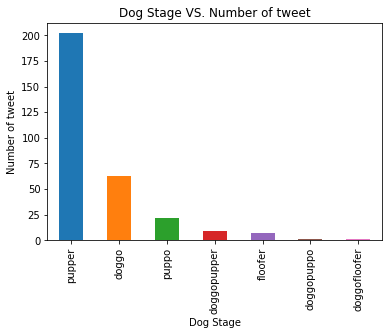

In [72]:
# Visualize what is the dog stage has more tweet 
FinalDataFrame['dog_stage'].value_counts().plot.bar()
plt.title('Dog Stage VS. Number of tweet')
plt.xlabel('Dog Stage')
plt.ylabel('Number of tweet')

As we can see above the dog stage which is the most tweet containe is of pupper stage and there is too much diffrent beween the number of tweet between these stages.  

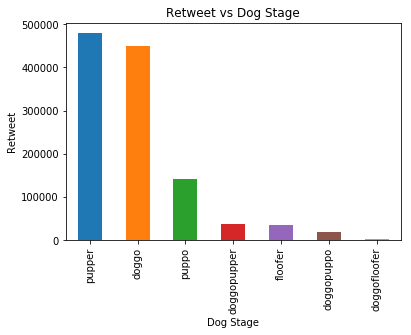

In [73]:
# Visualize what is the dog stage has more retweet  
FinalDataFrame.groupby('dog_stage').retweet_count.sum().sort_values(ascending = False).plot.bar()
plt.ylabel('Retweet')
plt.xlabel('Dog Stage')
plt.title('Retweet vs Dog Stage')
plt.show()

As we can see in above visualization the dog stage which is the have retweet count It is of pupper stage and then doggo stage there is not too much diffrent beween these two stages. 

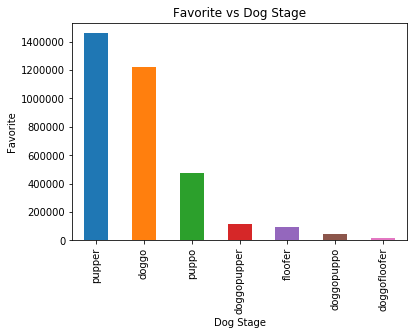

In [74]:
FinalDataFrame.groupby('dog_stage').favorite_count.sum().sort_values(ascending = False).plot.bar()
plt.ylabel('Favorite')
plt.xlabel('Dog Stage')
plt.title('Favorite vs Dog Stage')
plt.show()

As we can see in above visualization the dog stage which is the have favorite count It is of pupper stage and then doggo stage also there is not too much diffrent beween these two stages. 